In [ ]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
data = load_breast_cancer()

In [ ]:
type(data)

sklearn.utils.Bunch

In [ ]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [ ]:
data.data.shape

(569, 30)

In [ ]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [ ]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
data.target.shape

(569,)

In [ ]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(data.data, data.target, test_size=0.33)
N, D = x_train.shape

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(D,)),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100)

print("Train score:", model.evaluate(x_train, y_train))
print("Test score:", model.evaluate(x_test, y_test))

Epoch 1/100
12/12 [==============================] - 0s 16ms/step - loss: 0.7429 - accuracy: 0.5381 - val_loss: 0.7225 - val_accuracy: 0.5372
Epoch 2/100
12/12 [==============================] - 0s 3ms/step - loss: 0.6664 - accuracy: 0.6299 - val_loss: 0.6435 - val_accuracy: 0.6064
Epoch 3/100
12/12 [==============================] - 0s 3ms/step - loss: 0.6018 - accuracy: 0.6982 - val_loss: 0.5758 - val_accuracy: 0.6915
Epoch 4/100
12/12 [==============================] - 0s 3ms/step - loss: 0.5445 - accuracy: 0.7638 - val_loss: 0.5194 - val_accuracy: 0.7606
Epoch 5/100
12/12 [==============================] - 0s 3ms/step - loss: 0.4969 - accuracy: 0.8189 - val_loss: 0.4724 - val_accuracy: 0.8245
Epoch 6/100
12/12 [==============================] - 0s 3ms/step - loss: 0.4567 - accuracy: 0.8661 - val_loss: 0.4323 - val_accuracy: 0.8457
Epoch 7/100
12/12 [==============================] - 0s 3ms/step - loss: 0.4212 - accuracy: 0.8688 - val_loss: 0.3998 - val_accuracy: 0.8564
Epoch 8/100


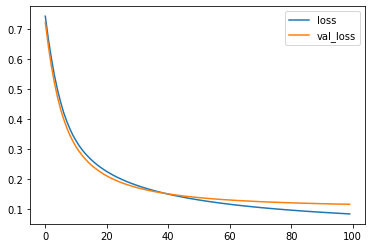

In [ ]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()



<function matplotlib.pyplot.legend>

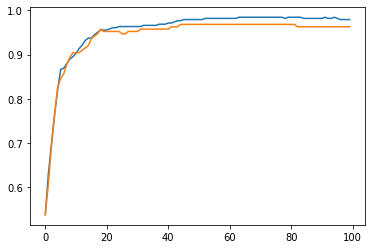

In [ ]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend

In [ ]:
P = model.predict(x_test)

print(P)

[[9.92429376e-01]
 [9.85636294e-01]
 [9.97765303e-01]
 [1.29631460e-02]
 [9.82654810e-01]
 [9.98497307e-01]
 [9.92370009e-01]
 [6.70805871e-02]
 [9.11125004e-01]
 [9.93659139e-01]
 [9.65975165e-01]
 [9.99130964e-01]
 [9.93245125e-01]
 [9.88892794e-01]
 [9.14085627e-01]
 [9.48889017e-01]
 [3.60397905e-01]
 [9.70404744e-01]
 [9.77849483e-01]
 [2.24828720e-04]
 [1.13913715e-02]
 [9.96038675e-01]
 [9.00624990e-02]
 [9.35687661e-01]
 [6.61462545e-04]
 [2.75135040e-03]
 [8.46483827e-01]
 [9.89572048e-01]
 [2.32349783e-01]
 [9.92065668e-01]
 [9.84158516e-01]
 [9.66594338e-01]
 [9.98111486e-01]
 [8.92970443e-01]
 [3.60003412e-02]
 [9.94855881e-01]
 [9.99549389e-01]
 [8.47748697e-01]
 [1.46339238e-02]
 [9.66636419e-01]
 [1.97955966e-03]
 [8.20171118e-01]
 [6.27008080e-03]
 [9.91611540e-01]
 [3.31431627e-04]
 [3.08761155e-05]
 [6.72459602e-04]
 [9.98735666e-01]
 [9.34608221e-01]
 [9.95034575e-01]
 [9.98881817e-01]
 [9.94127512e-01]
 [9.94585872e-01]
 [9.85335946e-01]
 [9.96847093e-01]
 [4.659936

In [ ]:
import numpy as np
P = np.round(P).flatten()
print(P)

[1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1.
 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0.
 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0.
 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1.
 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0.]


In [ ]:
print("Manually calculated accuracy:", np.mean(P == y_test))
print("Evaluate output:", model.evaluate(x_test, y_test))

Manually calculated accuracy: 0.9627659574468085
6/6 [==============================] - 0s 1ms/step - loss: 0.1167 - accuracy: 0.9628
Evaluate output: [0.11668657511472702, 0.9627659320831299]


In [ ]:
model.save('linearclassifier.h5')

In [ ]:
!ls -lh

total 24K
-rw-r--r-- 1 root root  19K Oct 16 14:15 linearclassifier.h5
drwxr-xr-x 1 root root 4.0K Oct 14 16:31 sample_data


In [ ]:
model = tf.keras.models.load_model('linearclassifier.h5')
print(model.layers)
model.evaluate(x_test, y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.1167 - accuracy: 0.9628


[0.11668657511472702, 0.9627659320831299]

In [ ]:
from google.colab import files
files.download('linearclassifier.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>